<a href="https://colab.research.google.com/github/Explorer803/IVA-Assignment-160122771084-/blob/main/IVA_ASSIGNMENT_1_(160122771084).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NAME : Soha Farisa
## Roll No : 160122771084

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Sample project for Color detection

Image: Adobe Express - file.png - Detected Color: Hot Pink (R=254, G=105, B=163)


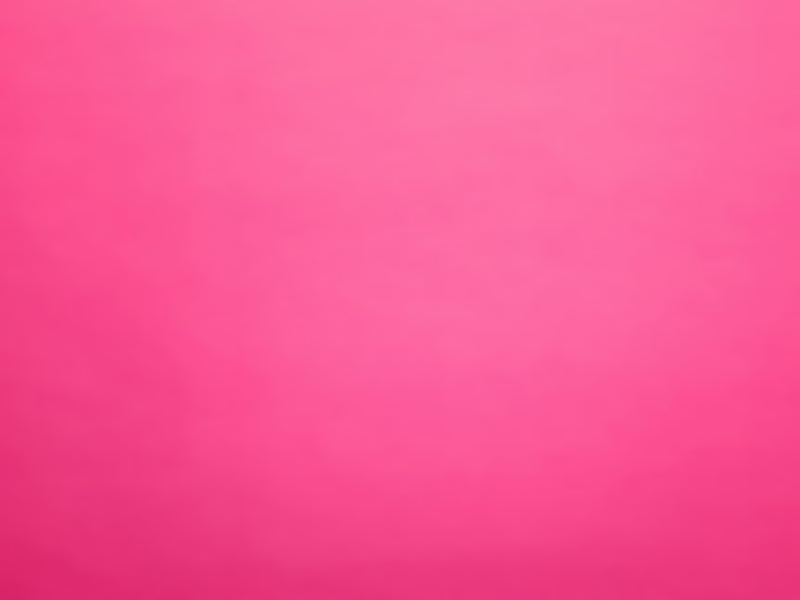

In [ ]:
import cv2
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow

# Load dataset
color_data = pd.read_csv("/content/drive/MyDrive/iva/colors.csv")

# Fix column names (strip spaces)
color_data.columns = color_data.columns.str.strip()

# Expected column names (Update these if necessary)
r_col, g_col, b_col, name_col = color_data.columns[3], color_data.columns[4], color_data.columns[5], color_data.columns[1]

# Load and resize two images
image_paths = [
    "/content/drive/MyDrive/iva/Adobe Express - file.png"     # Second image (Change this path)
]

# Function to get the closest color name
def get_color_name(R, G, B):
    min_dist = float("inf")
    color_name = ""

    for _, row in color_data.iterrows():
        dist = np.sqrt((R - row[r_col])**2 + (G - row[g_col])**2 + (B - row[b_col])**2)
        if dist < min_dist:
            min_dist = dist
            color_name = row[name_col]

    return color_name

# Function to detect color in an image
def detect_color_in_image(image_path, x, y):
    image = cv2.imread(image_path)  # Read image
    image = cv2.resize(image, (800, 600))  # Resize image
    B, G, R = image[y, x]  # Extract BGR values
    color_name = get_color_name(R, G, B)  # Get color name

    print(f"Image: {image_path.split('/')[-1]} - Detected Color: {color_name} (R={R}, G={G}, B={B})")

    # Show image
    cv2_imshow(image)

# Set coordinates to detect color (center of the image)
x, y = 400, 300

# Process both images
for img_path in image_paths:
    detect_color_in_image(img_path, x, y)


#Data structures for Image Analysis: Write a program that computes the T-pyramid of an image

Level 0: Image size 413x413


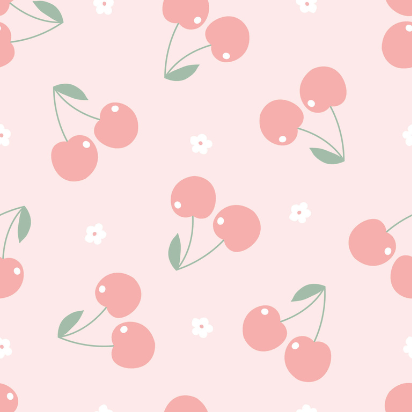

Level 1: Image size 207x207


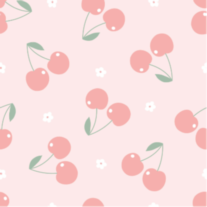

Level 2: Image size 104x104


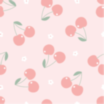

Level 3: Image size 52x52


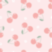

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("/content/drive/MyDrive/iva/Untitled design (2).png")

# Function to compute T-Pyramid
def compute_t_pyramid(image, levels=4):
    pyramid = [image]  # Initialize pyramid with original image
    for i in range(1, levels):
        image = cv2.pyrDown(image)  # Reduce image size using Gaussian Pyramid
        pyramid.append(image)
    return pyramid

# Compute T-Pyramid with 4 levels
t_pyramid = compute_t_pyramid(image, levels=4)

# Display each pyramid level
for i, img in enumerate(t_pyramid):
    print(f"Level {i}: Image size {img.shape[1]}x{img.shape[0]}")
    cv2_imshow(img)  # Show the image at this pyramid level


#Sample project for Image Smoothing

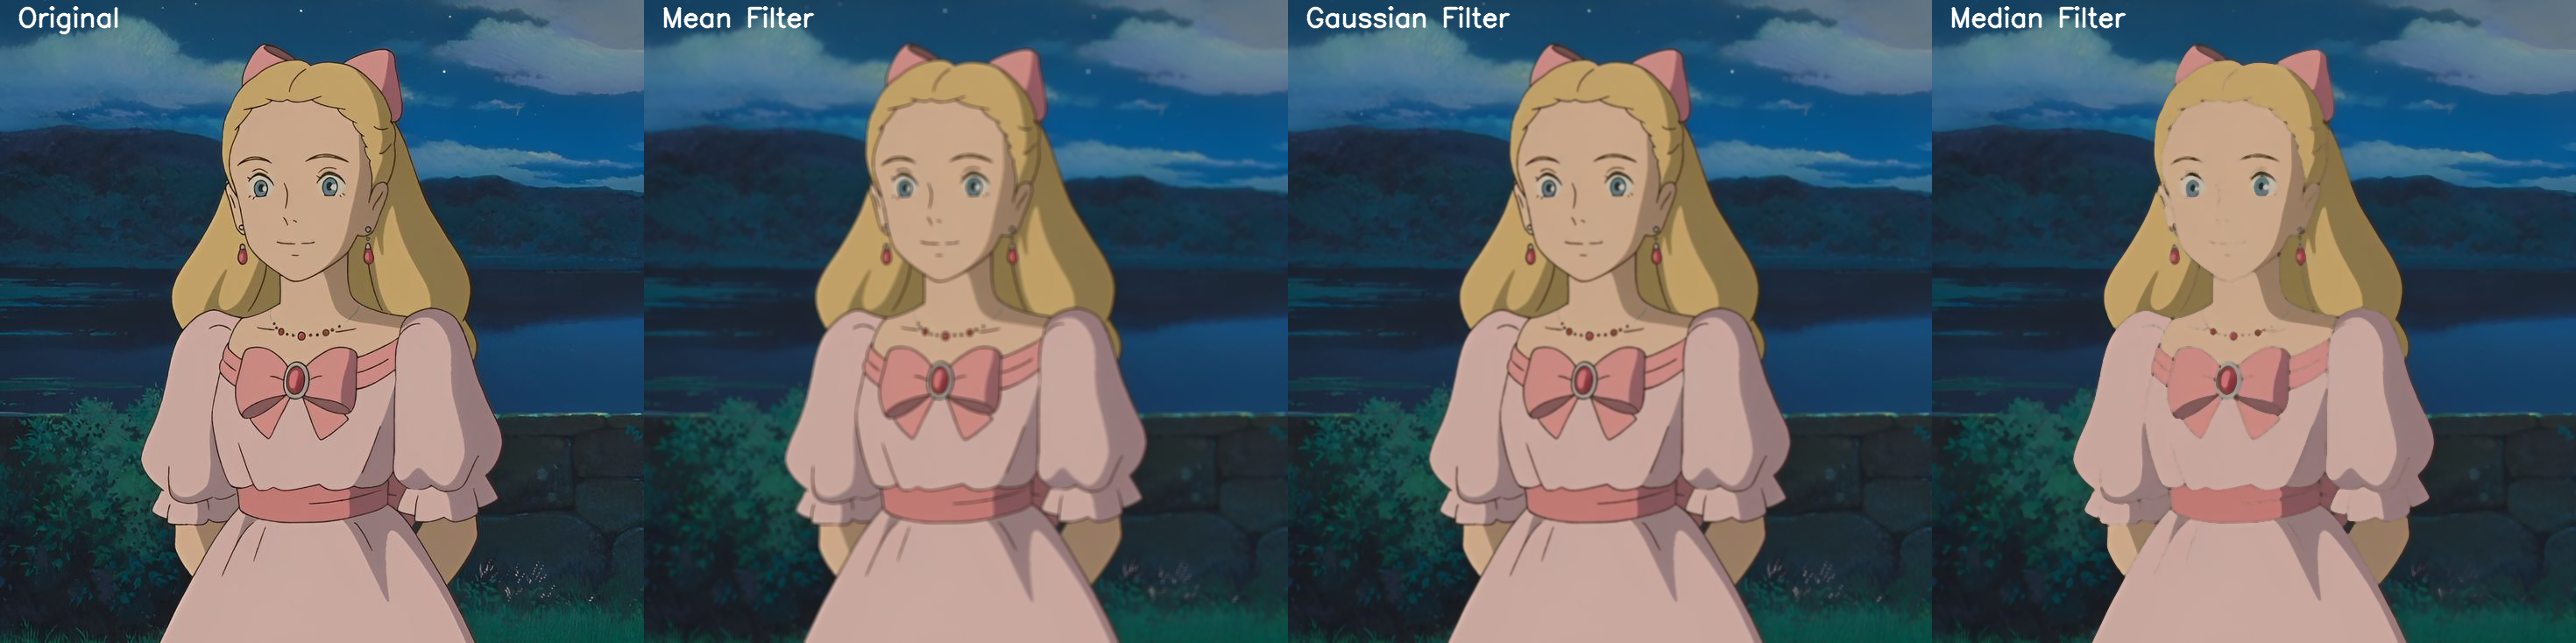

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image
image = cv2.imread("/content/drive/MyDrive/iva/MARNIE.jpg")

# Apply different smoothing filters with smaller kernel sizes
mean_blur = cv2.blur(image, (5, 5))  # Reduced from (15, 15) to (5, 5)
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
median_blur = cv2.medianBlur(image, 5)  # Reduced from 15 to 5

# Function to add text labels
def add_label(img, label):
    labeled_img = img.copy()
    cv2.putText(labeled_img, label, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return labeled_img

# Label images
image_labeled = add_label(image, "Original")
mean_blur_labeled = add_label(mean_blur, "Mean Filter")
gaussian_blur_labeled = add_label(gaussian_blur, "Gaussian Filter")
median_blur_labeled = add_label(median_blur, "Median Filter")

# Stack images for better comparison (side-by-side)
comparison = np.hstack((image_labeled, mean_blur_labeled, gaussian_blur_labeled, median_blur_labeled))

# Show the result
cv2_imshow(comparison)


#Sample project for Edge detection using Sobel ,Canny edge.

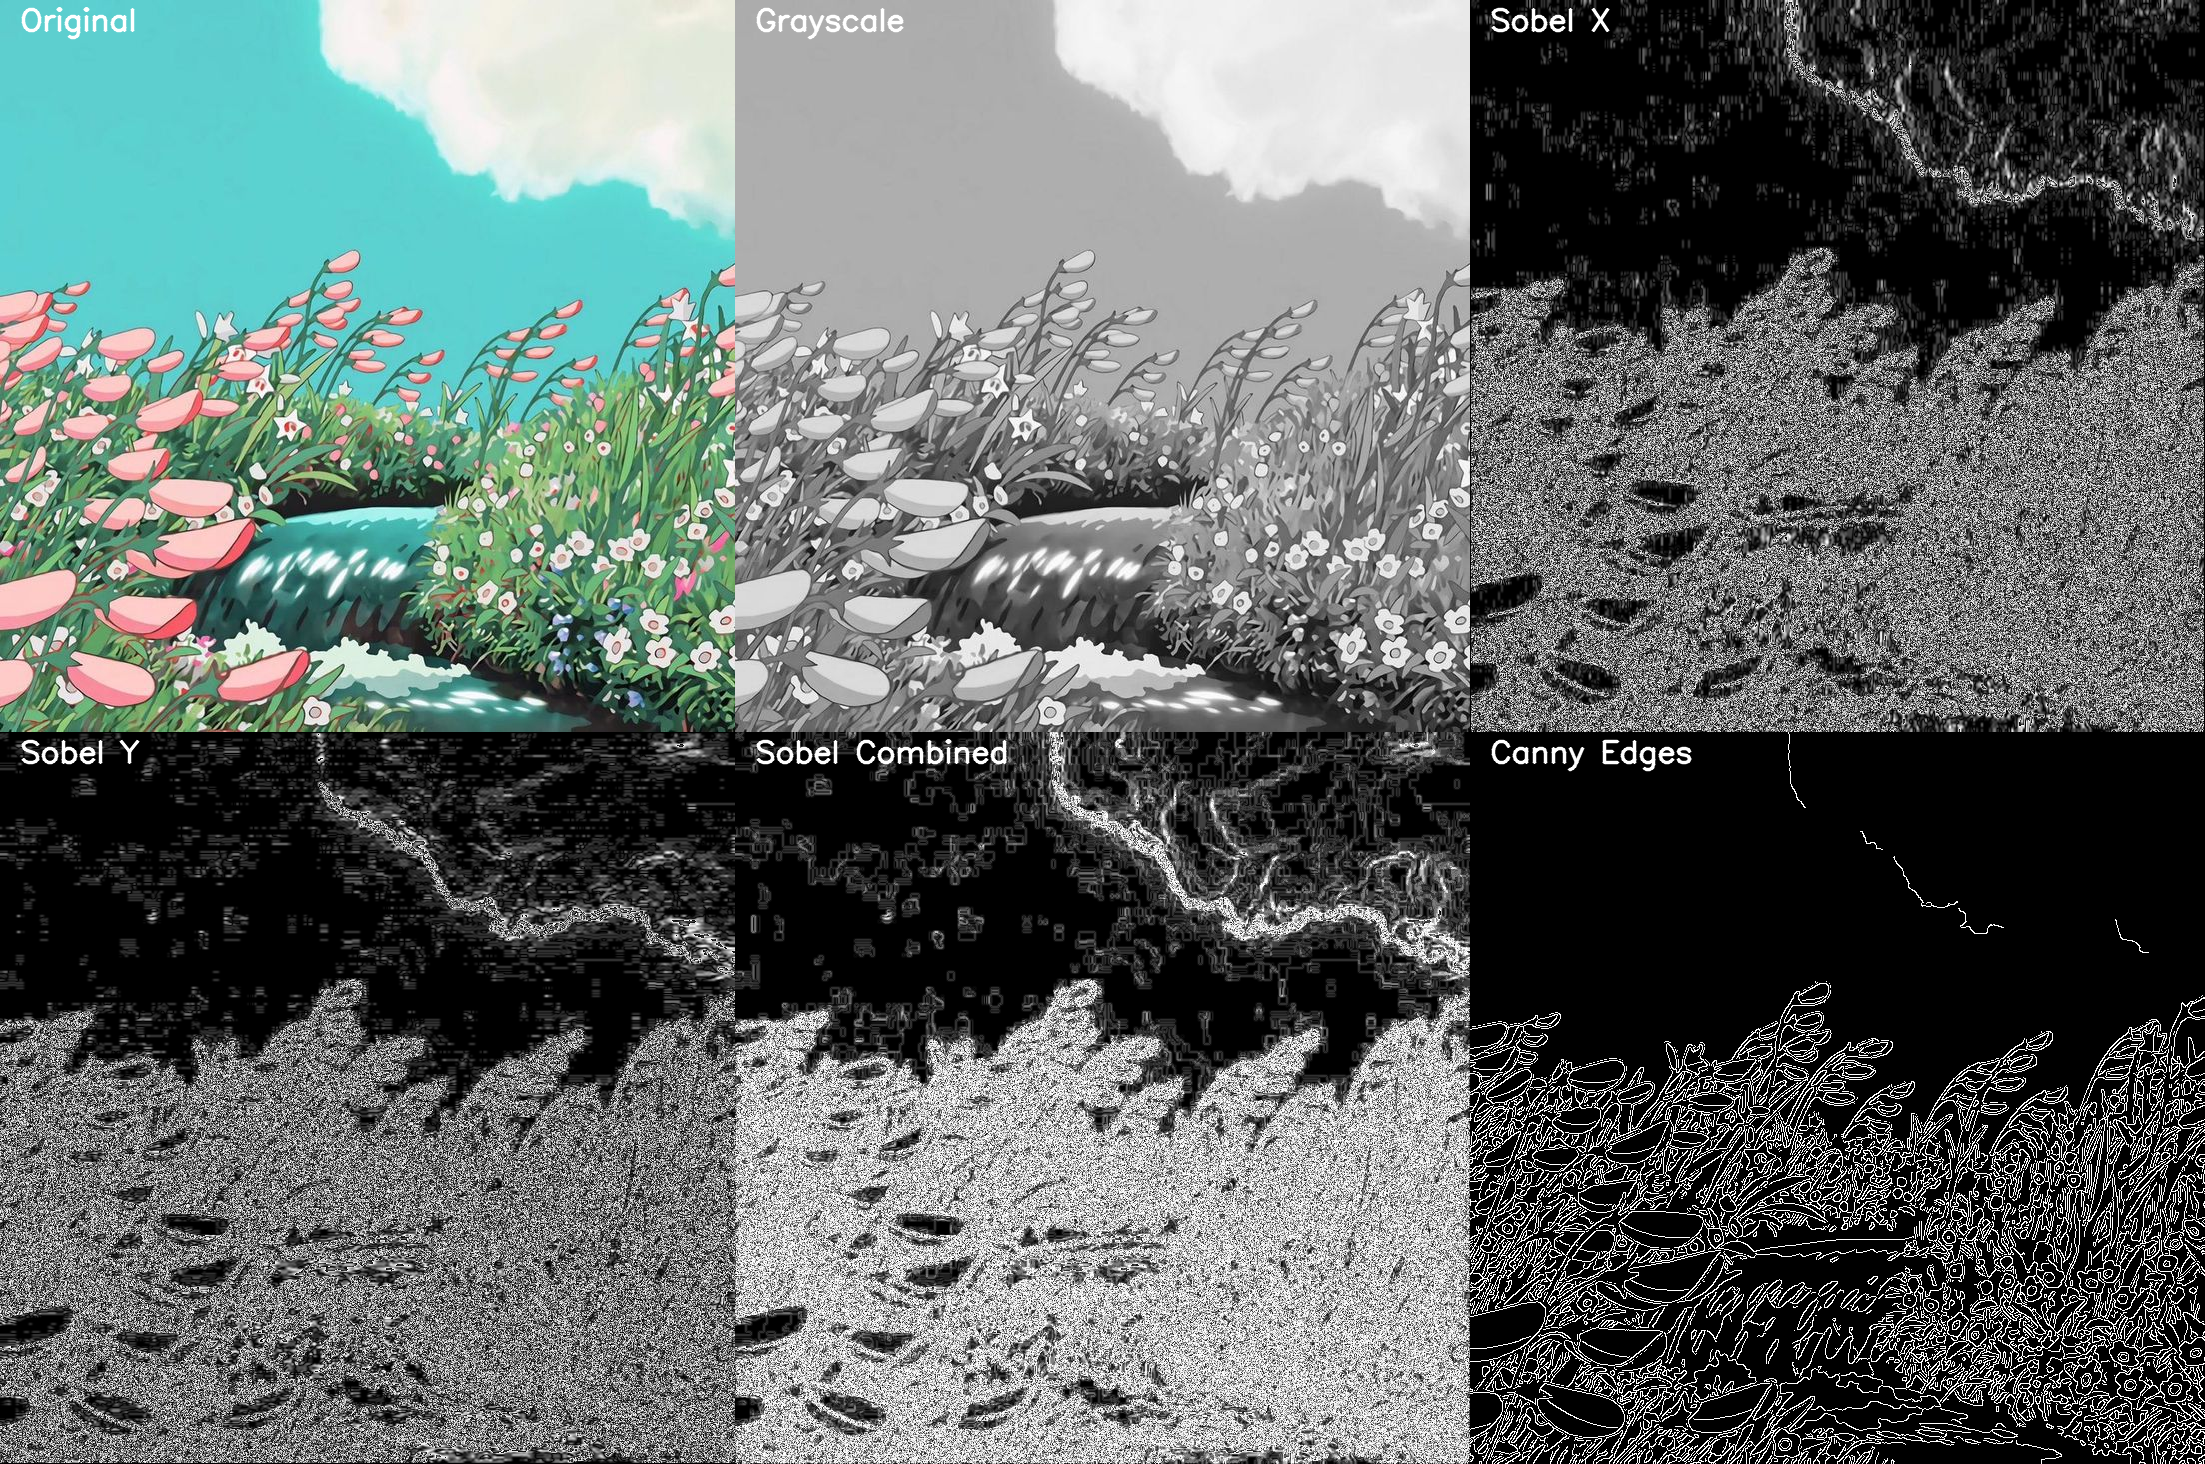

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load Image
image = cv2.imread("/content/drive/MyDrive/iva/PETAL.jpg")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Sobel Filters
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # Detects vertical edges
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)  # Detects horizontal edges

# Convert Sobel results to 8-bit images
sobel_x = np.uint8(np.absolute(sobel_x))
sobel_y = np.uint8(np.absolute(sobel_y))

# Combine Sobel X and Y
sobel_combined = cv2.bitwise_or(sobel_x, sobel_y)

# Apply Canny Edge Detection
canny_edges = cv2.Canny(gray, 50, 150)

# Function to add labels to images
def add_label(img, label):
    labeled_img = img.copy()
    cv2.putText(labeled_img, label, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return labeled_img

# Convert grayscale results to BGR for consistent visualization
gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
sobel_x = cv2.cvtColor(sobel_x, cv2.COLOR_GRAY2BGR)
sobel_y = cv2.cvtColor(sobel_y, cv2.COLOR_GRAY2BGR)
sobel_combined = cv2.cvtColor(sobel_combined, cv2.COLOR_GRAY2BGR)
canny_edges = cv2.cvtColor(canny_edges, cv2.COLOR_GRAY2BGR)

# Label images
image = add_label(image, "Original")
gray = add_label(gray, "Grayscale")
sobel_x = add_label(sobel_x, "Sobel X")
sobel_y = add_label(sobel_y, "Sobel Y")
sobel_combined = add_label(sobel_combined, "Sobel Combined")
canny_edges = add_label(canny_edges, "Canny Edges")

# Arrange images in a grid for visualization
row1 = np.hstack((image, gray, sobel_x))
row2 = np.hstack((sobel_y, sobel_combined, canny_edges))
grid = np.vstack((row1, row2))

# Display results
cv2_imshow(grid)


#Object Detection with OpenCV
• Detect simple objects like faces, eyes, or hands using OpenCV and Haar cascades.

• Libraries: OpenCV, NumPy

Number of faces detected: 6
Detected Objects


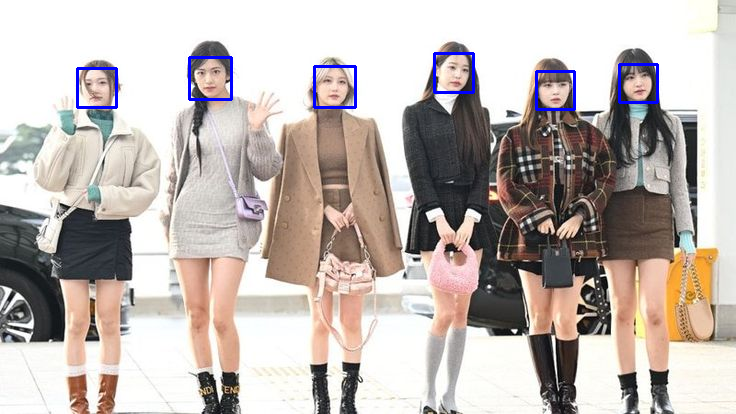

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load pre-trained Haar cascade classifiers for face & eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# Load Image
image = cv2.imread("/content/drive/MyDrive/iva/IVE.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Detect Faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

print(f"Number of faces detected: {len(faces)}")

# Loop through each detected face
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Draw face box
    roi_gray = gray[y:y+h, x:x+w]  # Region of interest for eyes
    roi_color = image[y:y+h, x:x+w]

    # Detect Eyes within the face
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)  # Draw eye box

# Show the final image with detected objects
print("Detected Objects")
cv2_imshow(image)
